In [50]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 10)

# Input data files are available in the read-only "../dataset/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\artists.csv
dataset\sample_submission.csv
dataset\Submission Guidelines-_For Candidate.pptx
dataset\test.csv
dataset\train.csv


In [58]:
train_data=pd.read_csv('dataset/train.csv', header=0, error_bad_lines=False, index_col=False, dtype='unicode')
test_data=pd.read_csv('dataset/test.csv', error_bad_lines=False, index_col=False, dtype='unicode',header=0)

C:\Users\raj71\AppData\Local\Temp\ipykernel_23896\1500792694.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train_data=pd.read_csv('dataset/train.csv', header=0, error_bad_lines=False, index_col=False, dtype='unicode')
C:\Users\raj71\AppData\Local\Temp\ipykernel_23896\1500792694.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test_data=pd.read_csv('dataset/test.csv', error_bad_lines=False, index_col=False, dtype='unicode',header=0)


In [59]:
train_data.head()

,song_id,artist_id,title,year,analysis_sample_rate,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,audio_md5,time_signature,time_signature_confidence,song_hotttnesss
0,SONG_510448,ARTIST_2029,Pressure (Explicit LP Version),2001,22050,202.39628,0.2,0,0.873,-3.609,1,1,193.544,111.195,a6220f6edb54938cd4f1a44f7ff48459,4,1,0.681185791
1,SONG_68913,ARTIST_1323,Tear Out My Eyes (Album Version),2002,22050,103.78404,2.328,2,1,-3.949,1,1,95.306,185.117,94aabc3aee57cb4b7878e5c4458c5623,1,0,0.734793817
2,SONG_158502,ARTIST_5289,Wherever I May Roam,1991,22050,421.53751,5.306,3,0.909,-4.016,1,1,415.945,136.193,7d06ef7368b3b2133cee7b01d2a0fd8b,4,0,0.586969017
3,SONG_60605,ARTIST_10938,Everything Goes Around,2003,22050,186.06975,0.27,0,0.576,-4.741,0,1,179.026,165.804,de533ef1cdf1199ca5acce91c87a30cd,4,0,0.605378416
4,SONG_71870,ARTIST_5135,Phatty Boom Batty (Album Version),1999,22050,212.45342,0,0,0.955,-4.926,1,1,204.922,143.209,62f2b97fa06c71078cbe3b15a6f36ad2,4,0.09,0.212045405


In [60]:
test_data.head()

,song_id,artist_id,title,year,analysis_sample_rate,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,audio_md5,time_signature,time_signature_confidence
0,SONG_365464,ARTIST_12557,Crying Eyes,1971,22050,193.38404,0.246,6,0.0,-19.962,1,0.0,180.135,117.37,d03823618266bb14421c5e0ce7c2dd80,4,0.665
1,SONG_451710,ARTIST_2939,Fuck and Run,1993,22050,187.34975,0.142,7,0.579,-8.862,1,0.611,183.049,136.153,7aec017d0194b627d3df0048a2548c6b,4,0.112
2,SONG_202731,ARTIST_5718,Highest Star,2009,22050,284.26404,0.0,2,0.306,-4.562,0,0.347,277.269,145.045,2260caf798801300dd08d95fa3bbacda,3,0.745
3,SONG_264595,ARTIST_11921,A Rush Of Blood To The Head (Live In Sydney),2003,22050,410.8273,0.0,5,0.463,-8.229,1,0.553,408.079,138.038,4c7564d1d8df7dd6ae4fd9c323a8e08d,4,0.59
4,SONG_119114,ARTIST_21432,Mormons/Gay Marriage/Chimp Prostitution,2010,22050,133.48526,0.0,7,0.457,-6.168,1,0.361,133.485,133.817,7110d232a4438695cb4e058d17975c62,4,0.594


In [61]:
train_data.describe()

,song_id,artist_id,title,year,analysis_sample_rate,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,audio_md5,time_signature,time_signature_confidence,song_hotttnesss
count,56220,56220,56220,56220,56220,56162,56220,56220,56162,56220,56220,56220,56220,56220,56220,56220,56220,56220
unique,55949,1297,51296,58,1,15017,2786,12,1002,17290,2,995,35772,42647,55815,7,1001,19713
top,SONG_150968,ARTIST_6178,Intro,0,22050,y,0,7,0,-6.195,1,0,227.631,0,ddd,4,0,0.215080319
freq,3,82,46,13469,56220,448,16329,7103,2892,16,37981,1550,9,92,374,35587,11341,945


In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56220 entries, 0 to 56219
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   song_id                    56220 non-null  object
 1   artist_id                  56220 non-null  object
 2   title                      56220 non-null  object
 3   year                       56220 non-null  object
 4   analysis_sample_rate       56220 non-null  object
 5   duration                   56162 non-null  object
 6   end_of_fade_in             56220 non-null  object
 7   key                        56220 non-null  object
 8   key_confidence             56162 non-null  object
 9   loudness                   56220 non-null  object
 10  mode                       56220 non-null  object
 11  mode_confidence            56220 non-null  object
 12  start_of_fade_out          56220 non-null  object
 13  tempo                      56220 non-null  object
 14  audio_

In [63]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27625 entries, 0 to 27624
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   song_id                    27625 non-null  object
 1   artist_id                  27625 non-null  object
 2   title                      27625 non-null  object
 3   year                       27625 non-null  object
 4   analysis_sample_rate       27625 non-null  object
 5   duration                   27625 non-null  object
 6   end_of_fade_in             27625 non-null  object
 7   key                        27625 non-null  object
 8   key_confidence             27625 non-null  object
 9   loudness                   27625 non-null  object
 10  mode                       27625 non-null  object
 11  mode_confidence            27625 non-null  object
 12  start_of_fade_out          27625 non-null  object
 13  tempo                      27625 non-null  object
 14  audio_

In [64]:
train_data.isnull().sum()

song_id                       0
artist_id                     0
title                         0
year                          0
analysis_sample_rate          0
duration                     58
end_of_fade_in                0
key                           0
key_confidence               58
loudness                      0
mode                          0
mode_confidence               0
start_of_fade_out             0
tempo                         0
audio_md5                     0
time_signature                0
time_signature_confidence     0
song_hotttnesss               0
dtype: int64

In [65]:
test_data.isnull().sum()

song_id                      0
artist_id                    0
title                        0
year                         0
analysis_sample_rate         0
duration                     0
end_of_fade_in               0
key                          0
key_confidence               0
loudness                     0
mode                         0
mode_confidence              0
start_of_fade_out            0
tempo                        0
audio_md5                    0
time_signature               0
time_signature_confidence    0
dtype: int64

In [66]:
train_data['key_confidence'].value_counts()

0        2892
1         952
z         269
0.59      101
0.001     100
         ... 
0.989       7
0.986       6
0.976       5
0.961       5
0.99        3
Name: key_confidence, Length: 1002, dtype: int64

In [67]:
train_data=train_data.dropna()

In [68]:
train_data.isnull().sum()

song_id                      0
artist_id                    0
title                        0
year                         0
analysis_sample_rate         0
duration                     0
end_of_fade_in               0
key                          0
key_confidence               0
loudness                     0
mode                         0
mode_confidence              0
start_of_fade_out            0
tempo                        0
audio_md5                    0
time_signature               0
time_signature_confidence    0
song_hotttnesss              0
dtype: int64

In [69]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56140 entries, 0 to 56219
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   song_id                    56140 non-null  object
 1   artist_id                  56140 non-null  object
 2   title                      56140 non-null  object
 3   year                       56140 non-null  object
 4   analysis_sample_rate       56140 non-null  object
 5   duration                   56140 non-null  object
 6   end_of_fade_in             56140 non-null  object
 7   key                        56140 non-null  object
 8   key_confidence             56140 non-null  object
 9   loudness                   56140 non-null  object
 10  mode                       56140 non-null  object
 11  mode_confidence            56140 non-null  object
 12  start_of_fade_out          56140 non-null  object
 13  tempo                      56140 non-null  object
 14  audio_

In [71]:
# numerical_columns=['year','analysis_sample_rate','end_of_fade_in','key','loudness','mode','mode_confidence','start_of_fade_out',
#                     'tempo','time_signature','time_signature_confidence']

numerical_columns= []

caterogical_columns=['song_id','artist_id','title', 'duration','key_confidence','audio_md5','year','analysis_sample_rate','end_of_fade_in','key','loudness','mode','mode_confidence','start_of_fade_out',
                    'tempo','time_signature','time_signature_confidence']

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")


from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="most_frequent")),
('std_scaler', StandardScaler()),
])



from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

num_attribs = numerical_columns
cat_attribs = caterogical_columns




full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
train_data_prepared = full_pipeline.fit_transform(train_data)

test_data_prepared = full_pipeline.fit_transform(test_data)

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data[numerical_columns].hist(bins=50, figsize=(20,15))
plt.show()

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [74]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr())

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1080x576 with 0 Axes>

C:\Users\raj71\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


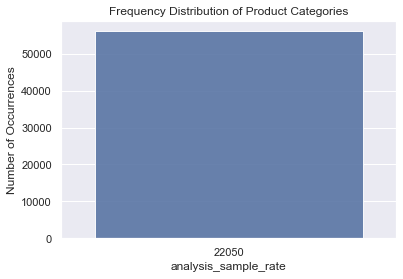

<Figure size 4320x1728 with 0 Axes>

C:\Users\raj71\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


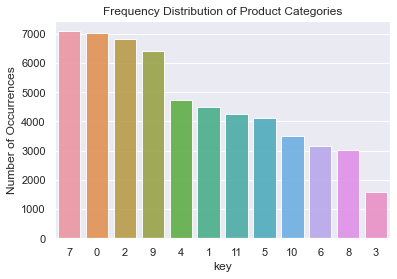

<Figure size 4320x1728 with 0 Axes>

C:\Users\raj71\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


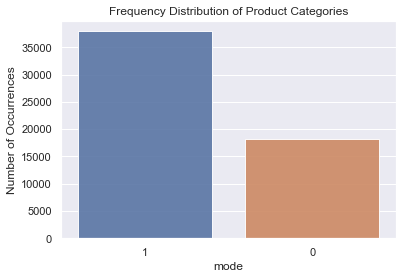

<Figure size 4320x1728 with 0 Axes>

C:\Users\raj71\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


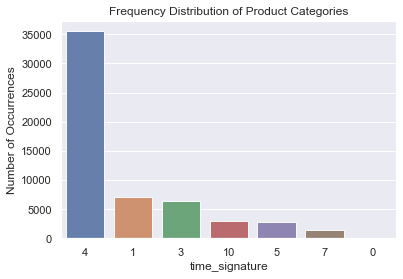

<Figure size 4320x1728 with 0 Axes>

In [75]:
for each in train_data.columns.to_list():
    #print(len(train_data[each].unique()),each)
    if len(train_data[each].unique())<40:
        carrier_count = train_data[each].value_counts()
        sns.set(style="darkgrid")
        sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
        plt.title('Frequency Distribution of Product Categories')
        plt.ylabel('Number of Occurrences', fontsize=12)
        plt.xlabel(each, fontsize=12)
        plt.figure(figsize=(60,24))
        plt.show()

In [76]:
!pip install xgboost
!pip install lightgbm 

In [77]:
valid_fraction = 0.05
valid_size = int(len(train_data) * valid_fraction)

train = train_data_prepared[:-2 * valid_size]
valid = train_data_prepared[-2 * valid_size:-valid_size]
test = train_data_prepared[-valid_size:]


train_l = train_data[:-2 * valid_size]
valid_l = train_data[-2 * valid_size:-valid_size]
test_l = train_data[-valid_size:]

In [81]:
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import seaborn as sns
from collections import Counter


params = {}
params['learning_rate'] = 0.06
params['max_depth'] = 50
params['n_estimators'] = 500
params['objective'] = 'reg:tweedie'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.6
params['reg_lambda'] = 1.1


# X, y = train_data.iloc[:, :-1], train_data.iloc[:, -1] 
  
# # Splitting 
# train_X, test_X, train_y, test_y = train_test_split(X, y, 
#                       test_size = 0.3, random_state = 123) 



clf = lgb.LGBMClassifier(**params)
clf.fit(train, train_l['song_hotttnesss'], early_stopping_rounds=100, eval_set=[(valid, valid_l['song_hotttnesss']),
        (test, test_l['song_hotttnesss'])],eval_metric='multi_error', verbose=True)

eval_score = accuracy_score(train_data['song_hotttnesss'], clf.predict(train_data_prepared))

print('Eval ACC: {}'.format(eval_score))

ValueError: y contains previously unseen labels: '0.594642245'